In [6]:
import numpy as np
import pandas as pd

# Load dataset (adjust path if needed)
df = pd.read_csv('/content/cars.csv')

# Drop unwanted index column
df.drop(columns=["Unnamed: 0"], inplace=True)

df.head()


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  price              15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [8]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [9]:
# Check missing values
df.isna().sum()

,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0
engine,0


In [10]:
# Convert columns to numeric if needed
numeric_cols = ["mileage", "engine", "max_power", "seats", "price"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Drop rows with missing values (simple approach)
df.dropna(inplace=True)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


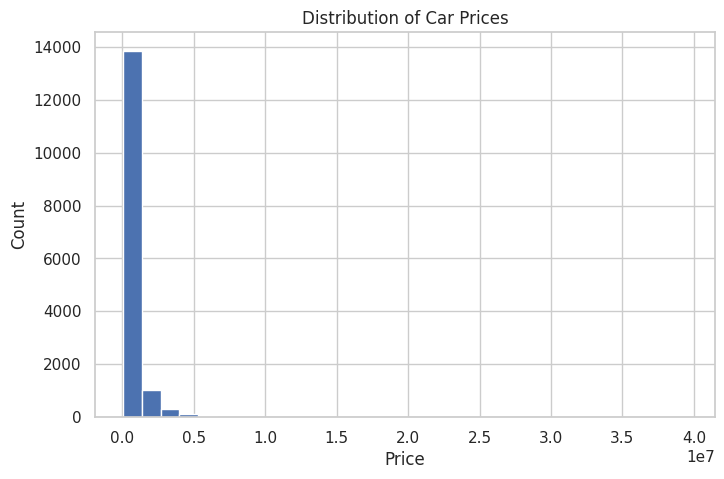

In [12]:
plt.figure(figsize=(8,5))
plt.hist(df["price"], bins=30)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Car Prices")
plt.show()


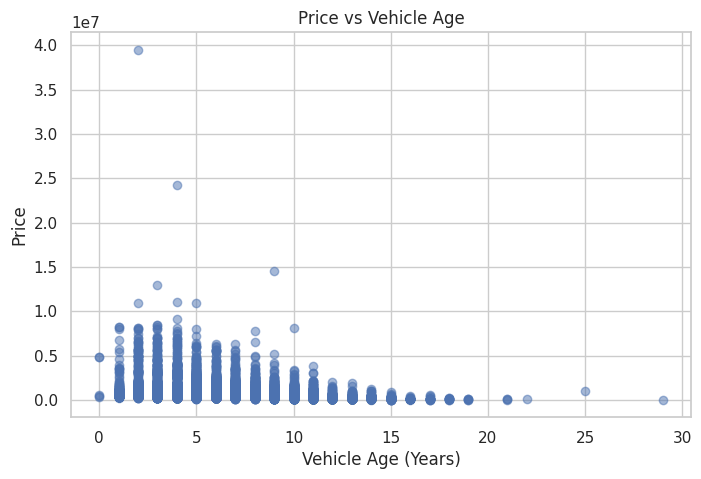

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(df["vehicle_age"], df["price"], alpha=0.5)
plt.xlabel("Vehicle Age (Years)")
plt.ylabel("Price")
plt.title("Price vs Vehicle Age")
plt.show()


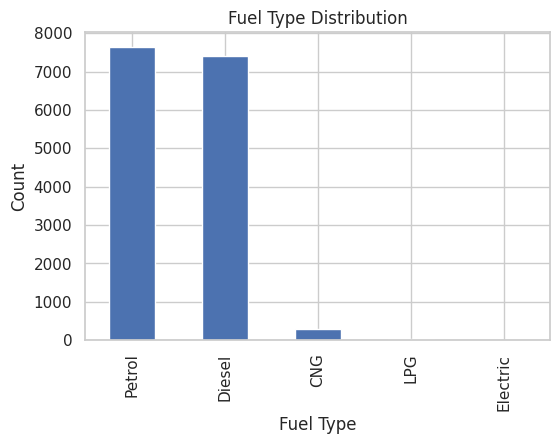

In [14]:
plt.figure(figsize=(6,4))
df["fuel_type"].value_counts().plot(kind="bar")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.title("Fuel Type Distribution")
plt.show()


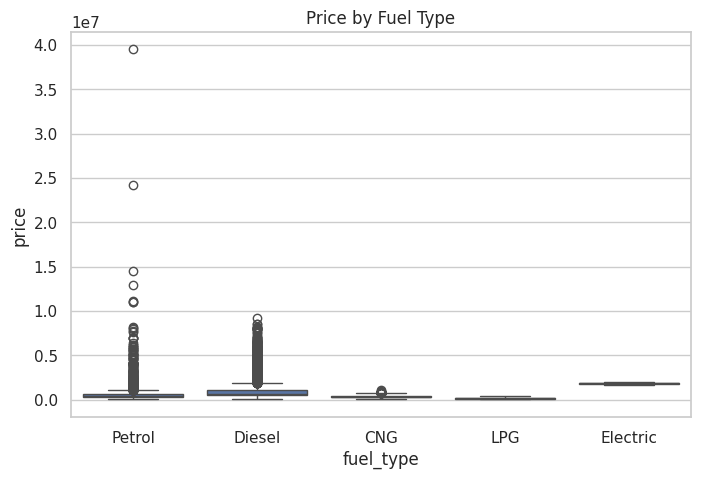

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x="fuel_type", y="price", data=df)
plt.title("Price by Fuel Type")
plt.show()


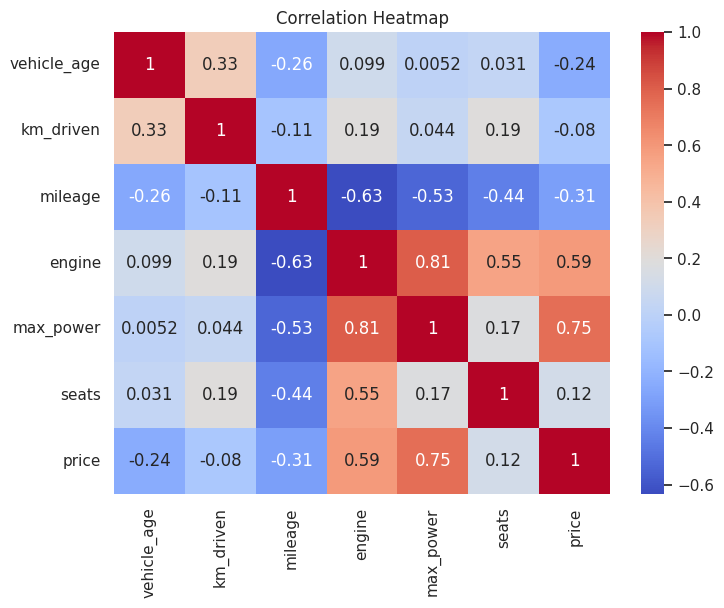

In [16]:
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [17]:
import plotly.express as px


In [18]:
fig = px.histogram(
    df,
    x="price",
    nbins=30,
    title="Interactive Price Distribution"
)
fig.show()


In [19]:
fig = px.scatter(
    df,
    x="vehicle_age",
    y="price",
    color="fuel_type",
    title="Price vs Vehicle Age"
)
fig.show()


In [20]:
fuel_counts = df["fuel_type"].value_counts().reset_index()
fuel_counts.columns = ["fuel_type", "count"]

fig = px.bar(
    fuel_counts,
    x="fuel_type",
    y="count",
    title="Fuel Type Distribution"
)
fig.show()


In [21]:
fig = px.scatter(
    df,
    x="engine",
    y="max_power",
    color="fuel_type",
    title="Engine Capacity vs Max Power"
)
fig.show()
